In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.models import Sequential, Model, Input
from keras.layers import Dense

In [51]:
df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/all_dwellings_combined_hour.csv",delimiter="\t", parse_dates = ['datetime'])

In [52]:
df = df.set_index(['datetime'])
df[100:200]

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-11 19:00:00,647.536987,0.0,367.320007,0.0,304.543915,0.0,314.056000,94.266663,0.0,2.728333,...,0.0,1.666667,10.116667,8.500000,4.050000,65.333336,26200.000000,1.833333,P01S01W7548,0.045013
2017-03-11 20:00:00,647.536987,0.0,368.049011,0.0,729.452759,0.0,314.058014,99.400002,0.0,2.676667,...,0.0,0.000000,9.333334,7.116667,4.150000,69.833336,23983.333984,1.000000,P01S01W7548,0.002014
2017-03-11 21:00:00,647.536987,0.0,368.578003,0.0,527.783325,0.0,314.263000,105.933334,0.0,2.335000,...,0.0,0.000000,8.616667,5.716667,3.733333,70.666664,22416.666016,1.500000,P01S01W7548,0.204987
2017-03-11 22:00:00,647.536987,0.0,369.109009,0.0,524.998596,0.0,314.264008,105.949997,0.0,2.241667,...,0.0,0.000000,7.816667,3.883333,3.266667,72.166664,20550.000000,1.833333,P01S01W7548,0.001007
2017-03-11 23:00:00,647.536987,0.0,369.501007,0.0,390.194458,0.0,314.265991,84.716667,0.0,1.928333,...,0.0,0.000000,6.133333,1.766667,2.516667,77.000000,19766.666016,2.666667,P01S01W7548,0.001984
2017-03-12 00:00:00,647.536987,0.0,369.631989,0.0,130.530548,0.0,314.265991,88.949997,0.0,1.840000,...,0.0,0.000000,5.733333,1.616667,2.500000,79.333336,18683.333984,2.333333,P01S01W7548,0.000000
2017-03-12 01:00:00,647.536987,0.0,369.759003,0.0,128.081924,0.0,314.265991,89.616669,0.0,2.305000,...,0.0,0.000000,6.408333,3.825000,2.741667,76.833336,20216.666016,1.250000,P01S01W7548,0.000000
2017-03-12 02:00:00,647.536987,0.0,369.855988,0.0,96.438744,0.0,314.265991,81.800003,0.0,1.546000,...,0.0,0.000000,5.460000,2.160000,1.960000,77.599998,22300.000000,1.800000,P01S01W7548,0.000000
2017-03-12 03:00:00,647.536987,0.0,369.976013,0.0,118.966667,0.0,314.265991,90.716667,0.0,1.625000,...,0.0,0.000000,4.450000,0.533333,1.533333,80.833336,22783.333984,2.166667,P01S01W7548,0.000000


# Quick EDA

In [53]:
#creating correlation matrix function
def corr_matrix (data):

    #initialising correlations
    corr = data.corr()

    #creating a mask for corr matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})



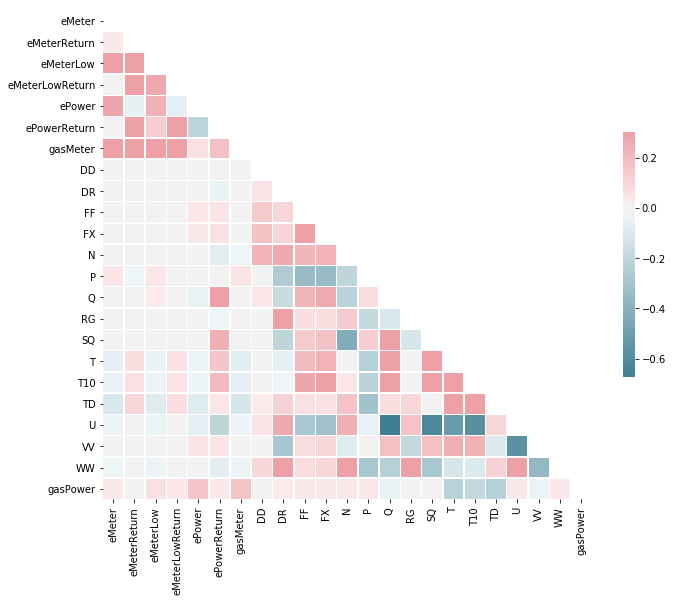

In [54]:
corr_matrix(df)

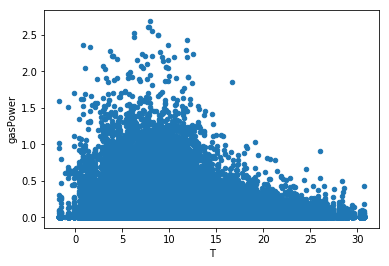

In [55]:
#quick scatter
df.plot(kind='scatter', x='T',y='gasPower')

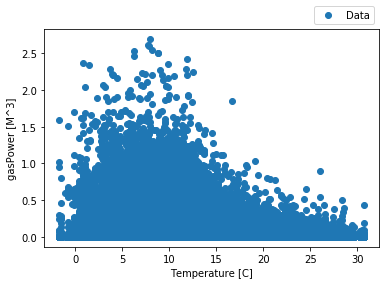

In [56]:
#quick scatter using matplotlib
#setting variables
x_data = df['T']
y_data = df['gasPower']

plt.plot(x_data,y_data,'o')
plt.xlabel('Temperature [C]')
plt.ylabel('gasPower [M^3]')
plt.legend(['Data'], bbox_to_anchor=(1,1), loc=4)
plt.show()

# Creating LR model

In [57]:
#creating LR function (a = wx + b)

#lowering data to speed up the process
#x_data = x_data[0:100]
#y_data = y_data[0:100]
#choosing the model
model = Sequential()
#setting "one layer" (because just single variable)
model.add(Dense(1, input_dim=1, kernel_initializer='normal',activation='linear'))
#creating the gradient descent code
model.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop',metrics=['mse'])


In [58]:
#looking at summarization of the model I created
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [59]:
#displaying the model structure in a different way

#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))
"""displaying model structure does not work since modules are not installed on the server"""

'displaying model structure does not work since modules are not installed on the server'

In [60]:
hist = model.fit(x_data,y_data,batch_size=1,epochs=100,shuffle=False)

Epoch 1/100
  7455/115931 [>.............................] - ETA: 159s - loss: nan - mean_squared_error: nan

KeyboardInterrupt: 